<a href="https://colab.research.google.com/github/Us9r/vault/blob/main/UAS_Big_Data/Sentimen_analysis__vader_textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('comments_with_replies.csv')

In [3]:
df = df[['Username','Comment']]
df.drop_duplicates(subset='Comment',inplace=True)
df = df[~df['Comment'].str.contains("JAVALAND88", na=False)]

<ipython-input-3-c280a0e777bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='Comment',inplace=True)


In [4]:
df.dropna(inplace=True) #inplace=True modifies the DataFrame directly

In [5]:
# prompt: reset index

df = df.reset_index(drop=True)


In [6]:
df_example = df.copy()
df_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10591 entries, 0 to 10590
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  10591 non-null  object
 1   Comment   10591 non-null  object
dtypes: object(2)
memory usage: 165.6+ KB


In [7]:
# Normalisasi
norm = {" yg ": " yang ", ' nggak ':' tidak ', ' gak ':' tidak ' ,' bangetdari ':' banget dari ','vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' ganjarmahfud ':' ganjar mahfud ', ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df_example['Comment'] = df['Comment'].apply(lambda x: normalisasi(x))
df

,Username,Comment
0,@AdriantDrian,Bus Bus Lintas Sumatera Jawa Kalimantan sudah ...
1,@saddestboy2966,rekomendasi power bank untuk starlink dong
2,@Dion-ry8td,lanjut bang
3,@tomotomo4066,Saya pengin beli tapi mau saya jual lagi. Kala...
4,@nicocs3316,"Wahh,,, bagus juga nih untuk yg tinggal di pel..."
...,...,...
10586,@Ferrysetiawa,Y
10587,@INDraXlast,Lah
10588,@Papahgamer21,Pertamaxx
10589,@limzz0307,Pertama nihh


In [8]:
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary

stop_words = StopWordRemoverFactory().get_stop_words()

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df_example['Comment'] = df_example['Comment'].apply(lambda x: stopword(x))
df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.8 MB/s eta 0:00:00


,Username,Comment
0,@AdriantDrian,Bus Bus Lintas Sumatera Jawa Kalimantan sudah ...
1,@saddestboy2966,rekomendasi power bank untuk starlink dong
2,@Dion-ry8td,lanjut bang
3,@tomotomo4066,Saya pengin beli tapi mau saya jual lagi. Kala...
4,@nicocs3316,"Wahh,,, bagus juga nih untuk yg tinggal di pel..."
...,...,...
10586,@Ferrysetiawa,Y
10587,@INDraXlast,Lah
10588,@Papahgamer21,Pertamaxx
10589,@limzz0307,Pertama nihh


In [9]:
# Tokenize
tokenized = df_example['Comment'].apply(lambda x:x.split())
tokenized

,Comment
0,"[Bus, Bus, Lintas, Sumatera, Jawa, Kalimantan,..."
1,"[rekomendasi, power, bank, starlink, dong]"
2,"[lanjut, bang]"
3,"[Saya, pengin, beli, mau, jual, lagi., Kalau, ..."
4,"[Wahh,,,, bagus, nih, tinggal, pelosok,, pegun..."
...,...
10586,[Y]
10587,[Lah]
10588,[Pertamaxx]
10589,"[Pertama, nihh]"


In [10]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

Streaming output truncated to the last 5000 lines.
cobain hutan 
telkomsel keringat dingin
internet kenceng buat apa kata salah satu mantan petinggi negara 
bang kalo bawa naik gunung kan deket langit lebih kenceng cepat internetnya
untuk daerah pelosok sulit sinyal ges orang kota cocok pakai provider
cocok pake sama adre kalaweit
gak ada internet bg jaring provider lokal nyampe kesitu bg
tol langit wujud mas elon 
elon musk pintar dia tau indonesia negara pulau banyak gunung di gunung susah singal nya good job banget lah elon musk
klo gk pintar gk bakal kaya bang
ya pinter lah kalo bloon mana mungkin pikir mobil listrik pikir roket sekarang pikir starlink
boring company jg visioner babamcat
ya tau elon musk kn anakx melon mas
dari dulu org amerika pinter pinter
sonjo4709 iya mereka dari turun pintar dapat investasi uang
pinteran indonesia mao jad wapres tinggal utak atik atur
kalau gk pinter gk mungkin kerja sama nasa teliti luar angkasa
gk lebay kalau gadang elon musk orang paling je

In [12]:
tokenized.head()

,Comment
0,bus bus lintas sumatera jawa kalimantan layak ...
1,rekomendasi power bank starlink dong
2,lanjut bang
3,saya pengin beli mau jual lagi kalau ngga ngga...
4,wahh bagus nih tinggal pelosok gunung yang jau...


In [14]:
!pip install googletrans==4.0.0-rc1
!pip install tqdm

from googletrans import Translator
from tqdm.notebook import tqdm

translator = Translator()

def translate_comment(comment):
    try:
        translation = translator.translate(comment, dest='en').text
        return translation
    except Exception as e:
        print(f"Translation error for comment '{comment}': {e}")
        return comment

# Wrap the apply function with tqdm to display a progress bar
tqdm.pandas()
df_example['Translated_Comment'] = df_example['Comment'].progress_apply(translate_comment)

print(df_example.head())

  0%|          | 0/10591 [00:00<?, ?it/s]

Translation error for comment '': the JSON object must be str, bytes or bytearray, not NoneType
Translation error for comment '': the JSON object must be str, bytes or bytearray, not NoneType
          Username                                            Comment  \
0    @AdriantDrian  Bus Bus Lintas Sumatera Jawa Kalimantan layak ...   
1  @saddestboy2966               rekomendasi power bank starlink dong   
2      @Dion-ry8td                                        lanjut bang   
3    @tomotomo4066  Saya pengin beli mau jual lagi. Kalau ngga ngg...   
4      @nicocs3316  Wahh,,, bagus nih tinggal pelosok, pegunungan ...   

                                  Translated_Comment  
0  Cross -Bus Sumatra Bus Jawa Kalimantan is suit...  
1                Starlink Power Bank Recommendations  
2                                               Bang  
3  I want to buy to sell again.If not, you don't ...  
4  Wahh ... it's good to stay remote, mountains t...  


In [15]:
# prompt: simpan hasil translate tersebut ke file csv

df_example.to_csv('translated_comments_real.csv', index=False)

In [16]:
df_example.head()

,Username,Comment,Translated_Comment
0,@AdriantDrian,Bus Bus Lintas Sumatera Jawa Kalimantan layak ...,Cross -Bus Sumatra Bus Jawa Kalimantan is suit...
1,@saddestboy2966,rekomendasi power bank starlink dong,Starlink Power Bank Recommendations
2,@Dion-ry8td,lanjut bang,Bang
3,@tomotomo4066,Saya pengin beli mau jual lagi. Kalau ngga ngg...,"I want to buy to sell again.If not, you don't ..."
4,@nicocs3316,"Wahh,,, bagus nih tinggal pelosok, pegunungan ...","Wahh ... it's good to stay remote, mountains t..."


In [17]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

df_example['Sentiment_Scores'] = df_example['Translated_Comment'].apply(analyze_sentiment)

print(df_example[['Translated_Comment', 'Sentiment_Scores']].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00
                                  Translated_Comment  \
0  Cross -Bus Sumatra Bus Jawa Kalimantan is suit...   
1                Starlink Power Bank Recommendations   
2                                               Bang   
3  I want to buy to sell again.If not, you don't ...   
4  Wahh ... it's good to stay remote, mountains t...   

                                    Sentiment_Scores  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...  
4  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...  


0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3        {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...
4        {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...
                               ...                        
10586    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10587    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10588    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10589    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10590    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentiment_Scores, Length: 10591, dtype: object
0        0.0000
1        0.0000
2        0.0000
3        0.1190
4        0.4404
          ...  
10586    0.0000
10587    0.0000
10588    0.0000
10589    0.0000
10590    0.0000
Name: Sentiment_Scores, Length: 10591, dtype: float64
                                      Translated_Comment  \
0      C

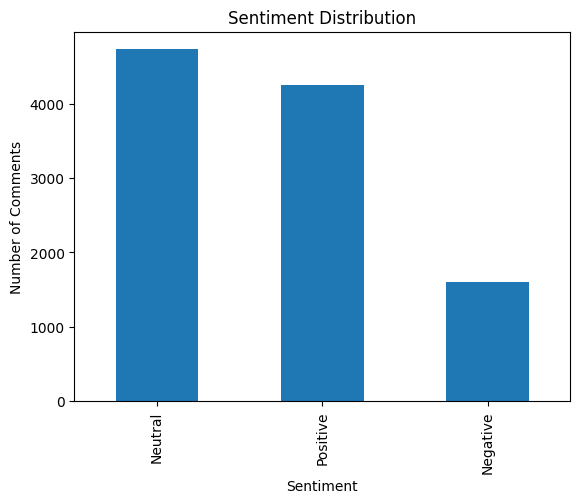

In [18]:
# prompt: tampilkan hasil analisis sentimen

# Assuming the code you provided is already executed and df_example is available

# Accessing sentiment scores
print(df_example['Sentiment_Scores'])

# Example: Extracting compound sentiment scores
compound_scores = df_example['Sentiment_Scores'].apply(lambda score_dict: score_dict['compound'])
print(compound_scores)

# Example: Classifying sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_example['Sentiment'] = compound_scores.apply(classify_sentiment)
print(df_example[['Translated_Comment', 'Sentiment_Scores', 'Sentiment']])

# Further analysis or visualizations
# Example: Count of each sentiment class
sentiment_counts = df_example['Sentiment'].value_counts()
print(sentiment_counts)

# Example: Plotting the sentiment distribution
import matplotlib.pyplot as plt
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

                                      Translated_Comment  TextBlob_Polarity  \
0      Cross -Bus Sumatra Bus Jawa Kalimantan is suit...           0.166667   
1                    Starlink Power Bank Recommendations           0.000000   
2                                                   Bang           0.000000   
3      I want to buy to sell again.If not, you don't ...           0.000000   
4      Wahh ... it's good to stay remote, mountains t...           0.233333   
...                                                  ...                ...   
10586                                                  Y           0.000000   
10587                                                Lah           0.000000   
10588                                          Pertamaxx           0.000000   
10589                                         First nihh           0.250000   
10590                                            31s ago           0.000000   

      TextBlob_Sentiment  
0               Positive

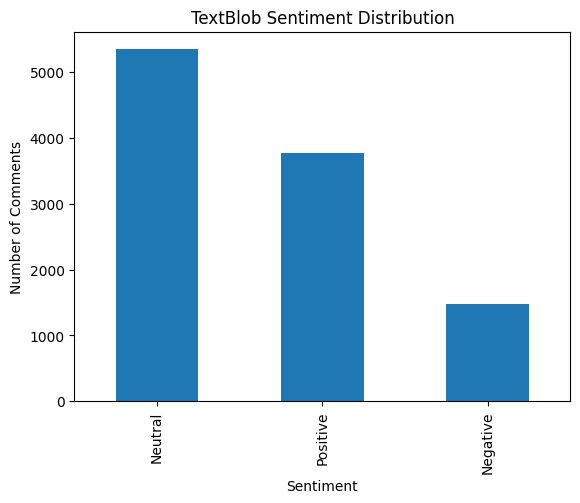

In [19]:
# prompt: lakukan analisis menggunakan textblob

!pip install textblob

from textblob import TextBlob

# Assuming df_example is already created and contains the 'Translated_Comment' column
# as per the provided code.

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


df_example['TextBlob_Polarity'] = df_example['Translated_Comment'].apply(analyze_sentiment_textblob)

def classify_sentiment_textblob(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_example['TextBlob_Sentiment'] = df_example['TextBlob_Polarity'].apply(classify_sentiment_textblob)

print(df_example[['Translated_Comment', 'TextBlob_Polarity', 'TextBlob_Sentiment']])


# Further analysis or visualizations using TextBlob's sentiment
# Example: Count of each sentiment class
textblob_sentiment_counts = df_example['TextBlob_Sentiment'].value_counts()
print(textblob_sentiment_counts)

# Example: Plotting the sentiment distribution
textblob_sentiment_counts.plot(kind='bar')
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()